In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
import statsmodels.stats.multitest

In [2]:
normalized_bulk_seq = pd.read_csv('/home/passala/passala/Collaborator_Data/Penelope_Dave_Collab/June_2022_DATA/NAM_RNAseq_normalized.csv', index_col= 0)
#normalized_bulk_seq = normalized_bulk_seq.drop(columns = ['CML333_1091/1092_1','CML333_1091/1092_2'])
bulk_seq_summary = pd.read_csv('/home/passala/passala/Collaborator_Data/Penelope_Dave_Collab/June_2022_DATA/NAM_RNAseq_metadata_no_outliers.csv',index_col= 0)

In [3]:
normalized_bulk_seq

,B73_1b,B73_2b,B73_1,B73_2,B73_3,B104_1,B104_2,B104_3,CML103_1b,CML103_2b,...,P39_1,P39_2,Tx303_1b,Tx303_2b,Oh43_1,Oh43_2,Oh43_3,Tzi8_1,Tzi8_2,Tzi8_3
GRMZM2G059865,65.708039,87.431692,104.671459,137.519284,139.688142,18.579829,27.425587,24.416977,69.377298,50.876896,...,100.824214,100.046235,87.281536,92.274217,96.409225,80.828232,87.889916,119.675045,157.567547,129.100112
GRMZM2G093344,2.826152,1.714347,1.316622,0.000000,0.000000,0.000000,0.000000,2.123215,1.508202,0.644011,...,1.095915,0.000000,0.563107,0.000000,0.000000,1.107236,0.000000,0.000000,0.000000,0.000000
GRMZM2G093399,0.000000,0.000000,0.000000,1.175378,0.000000,0.000000,0.000000,0.000000,1.508202,3.220057,...,0.000000,0.000000,9.572814,4.613711,0.000000,0.000000,0.000000,7.890662,2.387387,4.451728
GRMZM5G809743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRMZM5G833153,0.000000,0.000000,0.658311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS3.1,7.065381,6.857388,8.558044,3.526135,10.443973,6.967436,6.856397,8.492862,0.000000,8.372147,...,8.767323,6.979970,7.320387,12.303229,12.051153,11.072361,5.231543,3.945331,5.968468,6.677592
NDHD,0.706538,0.000000,0.000000,0.000000,3.916490,0.000000,2.742559,0.000000,0.000000,0.000000,...,2.191831,1.163328,0.563107,6.151614,1.205115,1.107236,0.000000,1.315110,1.193694,3.338796
PSAC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC191109.3_FG001,0.000000,1.142898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.287746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
bulk_seq_summary = bulk_seq_summary.drop_duplicates(subset= ['condition'], keep= 'first')
bulk_seq_summary.at['fea3.2_1b','condition'] = 'fea3.2'


In [5]:
NAM_line_list = bulk_seq_summary['condition'].to_list()
NAM_list_of_avg_meristem_sizes = bulk_seq_summary['size']
NAM_list_of_avg_meristem_sizes.index = NAM_line_list

In [285]:
bulk_seq_summary_no_fea = bulk_seq_summary.drop('fea3.2_1b')


In [286]:
NAM_line_list_no_fea = bulk_seq_summary_no_fea['condition'].to_list()
NAM_list_of_avg_meristem_sizes_no_fea = bulk_seq_summary_no_fea['size']
NAM_list_of_avg_meristem_sizes_no_fea.index = NAM_line_list_no_fea

In [6]:
len(NAM_line_list)

26

In [7]:
NAM_line_list

['B73',
 'B104',
 'CML103',
 'CML228',
 'CML277',
 'CML322',
 'CML333',
 'CML52',
 'CML69',
 'fea3.2',
 'Hp301',
 'Il14H',
 'Ki11',
 'Ki3',
 'Ky21',
 'M162W',
 'Mo17',
 'Mo18W',
 'Ms71',
 'NC350',
 'NC358',
 'Oh7B',
 'P39',
 'Tx303',
 'Oh43',
 'Tzi8']

In [8]:
normalized_mean_values_of_each_landrace = pd.DataFrame(index= normalized_bulk_seq.index)
for landrace in NAM_line_list:
    normalized_mean_values_of_each_landrace[landrace] = normalized_bulk_seq.filter(like = landrace,axis = 1).mean(axis = 1).values

In [9]:
normalized_mean_values_of_each_landrace

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,107.003723,23.474131,67.132606,65.815394,112.123231,82.056961,181.446526,167.598631,61.734613,63.564394,...,43.410228,58.590552,128.247043,91.441493,101.856559,59.877009,100.435224,89.777876,88.375791,135.447568
GRMZM2G093344,1.171424,0.707738,1.505207,1.418244,0.688642,0.344226,0.356207,0.316641,2.270416,1.097803,...,0.711404,1.041700,0.000000,1.769452,0.000000,0.557644,0.547958,0.281553,0.369079,0.000000
GRMZM2G093399,0.235076,0.000000,2.363888,4.045262,6.617115,2.916686,0.000000,2.304485,0.000000,0.347227,...,0.086334,0.168980,8.868633,2.109341,6.560702,6.345031,0.000000,7.093262,0.000000,4.909926
GRMZM5G809743,0.000000,0.000000,0.000000,0.000000,0.365918,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.639803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRMZM5G833153,0.131662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.489846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS3.1,7.290184,7.438898,5.154122,6.226563,7.272790,5.196469,9.639272,6.578360,10.153669,5.467139,...,10.026627,7.174660,8.184669,6.288047,7.106185,4.601023,7.873646,9.811808,9.451685,5.530464
NDHD,0.924606,0.914186,0.262601,0.826671,0.693755,0.951214,0.464466,0.741182,0.756805,1.286163,...,1.073361,0.113652,0.591419,0.489846,0.000000,0.476555,1.677580,3.357361,0.770784,1.949200
PSAC,0.000000,0.000000,0.000000,0.149595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.299835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC191109.3_FG001,0.228580,0.000000,0.000000,0.269987,0.327837,0.000000,0.000000,0.204460,0.630397,0.193112,...,0.459901,0.084490,0.591419,0.000000,0.000000,0.000000,1.643873,0.000000,0.000000,0.000000


In [10]:
normalized_mean_values_no_fea_mutant = normalized_mean_values_of_each_landrace.drop(columns = 'fea3.2')

In [11]:
expressed_in_any_lowest_scrutiny = normalized_mean_values_of_each_landrace.loc[(normalized_mean_values_of_each_landrace>1).sum(axis =1)> 0]
expressed_in_any_lowest_scrutiny

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,107.003723,23.474131,67.132606,65.815394,112.123231,82.056961,181.446526,167.598631,61.734613,63.564394,...,43.410228,58.590552,128.247043,91.441493,101.856559,59.877009,100.435224,89.777876,88.375791,135.447568
GRMZM2G093344,1.171424,0.707738,1.505207,1.418244,0.688642,0.344226,0.356207,0.316641,2.270416,1.097803,...,0.711404,1.041700,0.000000,1.769452,0.000000,0.557644,0.547958,0.281553,0.369079,0.000000
GRMZM2G093399,0.235076,0.000000,2.363888,4.045262,6.617115,2.916686,0.000000,2.304485,0.000000,0.347227,...,0.086334,0.168980,8.868633,2.109341,6.560702,6.345031,0.000000,7.093262,0.000000,4.909926
GRMZM2G104572,0.396905,0.457093,0.691942,0.863669,0.327837,0.939440,0.820673,0.204460,1.387202,1.423156,...,0.172668,0.396284,2.116239,0.000000,0.000000,1.632785,0.000000,1.332058,0.401705,0.000000
GRMZM2G023794,0.228580,0.000000,1.457276,0.149595,0.360805,0.000000,0.000000,0.000000,0.000000,1.075928,...,0.000000,0.000000,2.116239,0.000000,0.000000,0.537409,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM5G853305,2.069799,2.853177,4.490639,3.162773,5.572781,2.538596,3.527029,0.741182,3.468829,2.863434,...,3.755017,1.852635,1.774257,3.238990,2.574634,1.481256,1.129622,2.739825,1.099244,4.633262
RPS3.1,7.290184,7.438898,5.154122,6.226563,7.272790,5.196469,9.639272,6.578360,10.153669,5.467139,...,10.026627,7.174660,8.184669,6.288047,7.106185,4.601023,7.873646,9.811808,9.451685,5.530464
NDHD,0.924606,0.914186,0.262601,0.826671,0.693755,0.951214,0.464466,0.741182,0.756805,1.286163,...,1.073361,0.113652,0.591419,0.489846,0.000000,0.476555,1.677580,3.357361,0.770784,1.949200
AC191109.3_FG001,0.228580,0.000000,0.000000,0.269987,0.327837,0.000000,0.000000,0.204460,0.630397,0.193112,...,0.459901,0.084490,0.591419,0.000000,0.000000,0.000000,1.643873,0.000000,0.000000,0.000000


In [14]:
expressed_in_any_lowest_scrutiny_no_fea = normalized_mean_values_no_fea_mutant.loc[(normalized_mean_values_no_fea_mutant>1).sum(axis =1)> 0]


In [12]:
expressed_in_all_highest_scrutiny =normalized_mean_values_of_each_landrace.loc[(normalized_mean_values_of_each_landrace>1).sum(axis =1) ==26]

In [17]:
expressed_in_all_highest_scrutiny_no_fea =normalized_mean_values_no_fea_mutant.loc[(normalized_mean_values_no_fea_mutant>1).sum(axis =1) ==25]

In [18]:
expressed_in_all_highest_scrutiny_no_fea

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,Hp301,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,107.003723,23.474131,67.132606,65.815394,112.123231,82.056961,181.446526,167.598631,61.734613,74.452636,...,43.410228,58.590552,128.247043,91.441493,101.856559,59.877009,100.435224,89.777876,88.375791,135.447568
GRMZM2G330436,23.138839,23.234683,24.607922,30.811098,22.900331,47.287038,26.404735,30.485025,25.918527,26.630386,...,25.064037,25.202386,23.121732,20.713543,22.816825,25.693033,16.194131,17.543885,27.602299,24.765810
GRMZM2G032104,18.821421,12.068816,17.701987,18.311709,14.337097,24.352274,18.023864,14.170458,11.603252,17.692608,...,8.976142,17.473884,21.910696,24.962257,18.483958,22.655934,21.429109,24.540159,20.918418,14.217556
GRMZM2G073979,23.043833,26.386545,23.624922,21.939978,26.895200,26.194496,24.500023,26.276299,29.515412,23.392396,...,32.207264,28.190724,28.478000,18.074382,16.541642,22.849546,15.747293,17.543885,21.836350,21.946146
GRMZM2G374777,1.894260,3.730561,2.892085,2.683796,1.458558,1.415690,1.977444,2.219266,4.667241,3.574432,...,4.348320,2.793087,2.707657,4.068724,1.642195,1.632463,3.936823,1.407767,1.574194,1.922279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATPI,3.847388,4.862182,6.357302,8.025281,6.009747,6.250888,5.267846,6.369619,5.108848,7.528421,...,5.420438,4.109461,3.921343,10.956600,6.528626,5.124126,6.229773,7.429244,5.820356,4.734485
RPS11.3,10.102740,11.692973,9.119560,10.149805,16.805184,8.222693,10.884191,10.500071,11.225673,9.429266,...,18.726768,9.418561,13.941965,10.506729,4.600911,8.168647,9.551226,20.804258,13.118496,8.316115
RPL14,10.642144,7.088621,4.826633,6.076968,8.789880,6.613502,8.710340,4.368987,7.630435,6.771217,...,8.594949,7.624366,8.994676,11.746360,5.642865,5.159067,6.811438,2.458272,8.870864,5.307824
RPS3.1,7.290184,7.438898,5.154122,6.226563,7.272790,5.196469,9.639272,6.578360,10.153669,7.081401,...,10.026627,7.174660,8.184669,6.288047,7.106185,4.601023,7.873646,9.811808,9.451685,5.530464


In [19]:
expressed_genes_each_landrace = normalized_mean_values_of_each_landrace.loc[normalized_mean_values_of_each_landrace.mean(axis =1) >1]
expressed_genes_each_landrace

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,107.003723,23.474131,67.132606,65.815394,112.123231,82.056961,181.446526,167.598631,61.734613,63.564394,...,43.410228,58.590552,128.247043,91.441493,101.856559,59.877009,100.435224,89.777876,88.375791,135.447568
GRMZM2G093399,0.235076,0.000000,2.363888,4.045262,6.617115,2.916686,0.000000,2.304485,0.000000,0.347227,...,0.086334,0.168980,8.868633,2.109341,6.560702,6.345031,0.000000,7.093262,0.000000,4.909926
GRMZM2G023863,0.141308,0.353869,0.214670,20.500296,44.591491,22.857569,9.538722,0.536722,26.484896,0.193112,...,40.077739,2.625485,0.311134,36.188738,0.987196,11.564193,1.677580,18.421694,23.688265,50.144699
GRMZM2G408834,0.000000,0.740949,0.000000,6.660747,9.971197,10.568978,1.244919,7.616281,0.315198,0.171238,...,1.628773,8.108763,2.458220,1.469538,0.917836,1.714949,10.166597,10.656468,0.000000,2.428042
GRMZM2G330436,23.138839,23.234683,24.607922,30.811098,22.900331,47.287038,26.404735,30.485025,25.918527,24.579862,...,25.064037,25.202386,23.121732,20.713543,22.816825,25.693033,16.194131,17.543885,27.602299,24.765810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS8.6,3.142358,1.905781,0.262601,1.796130,4.190384,1.054455,4.971969,2.327166,2.964841,3.064166,...,4.777503,4.488846,2.365675,2.749144,2.274513,1.282991,1.129622,2.533980,5.565140,2.771916
RPL14,10.642144,7.088621,4.826633,6.076968,8.789880,6.613502,8.710340,4.368987,7.630435,5.531873,...,8.594949,7.624366,8.994676,11.746360,5.642865,5.159067,6.811438,2.458272,8.870864,5.307824
GRMZM5G853305,2.069799,2.853177,4.490639,3.162773,5.572781,2.538596,3.527029,0.741182,3.468829,2.863434,...,3.755017,1.852635,1.774257,3.238990,2.574634,1.481256,1.129622,2.739825,1.099244,4.633262
RPS3.1,7.290184,7.438898,5.154122,6.226563,7.272790,5.196469,9.639272,6.578360,10.153669,5.467139,...,10.026627,7.174660,8.184669,6.288047,7.106185,4.601023,7.873646,9.811808,9.451685,5.530464


In [20]:
expressed_genes_each_landrace_no_fea = normalized_mean_values_no_fea_mutant.loc[normalized_mean_values_no_fea_mutant.mean(axis =1) >1]


In [21]:
plot_pearson = pd.DataFrame(data = zip(NAM_list_of_avg_meristem_sizes,expressed_genes_each_landrace.loc['AC204711.3_FG003']), columns = ['Meristem Size','Gene Expression'])

<AxesSubplot:xlabel='Meristem Size', ylabel='Gene Expression'>

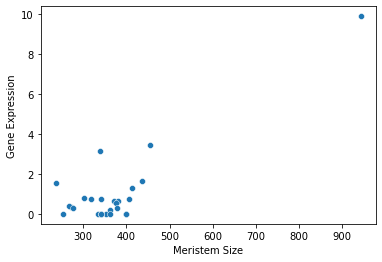

In [22]:
sns.scatterplot(data = plot_pearson, x = 'Meristem Size', y = 'Gene Expression')

In [23]:
expressed_genes_each_landrace.loc['GRMZM2G046532'].index == NAM_list_of_avg_meristem_sizes.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [24]:
expressed_genes_ranks = expressed_genes_each_landrace.mean(axis =1).rank()
expressed_genes_ranks

GRMZM2G059865    16935.0
GRMZM2G093399     3221.0
GRMZM2G023863    11590.0
GRMZM2G408834     4355.0
GRMZM2G330436    13852.0
                  ...   
RPS8.6            2979.0
RPL14             7355.0
GRMZM5G853305     2843.0
RPS3.1            7539.0
GRMZM2G372364    15555.0
Length: 18334, dtype: float64

In [102]:
expressed_genes_ranks['GRMZM2G109959']

5599.0

In [28]:
expressed_genes_ranks_no_fea = expressed_genes_each_landrace_no_fea.mean(axis =1).rank()

<AxesSubplot:ylabel='Count'>

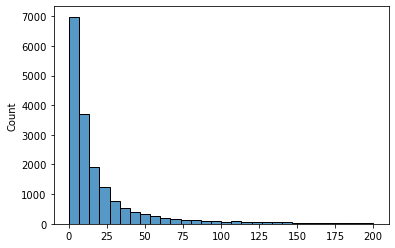

In [25]:
sns.histplot(expressed_genes_each_landrace.mean(axis =1), binrange = (0,200),bins = 30)

In [26]:
expressed_genes_each_landrace.max(axis =0)

B73       29766.986426
B104      36718.908183
CML103    35645.334394
CML228    27187.095437
CML277    32737.458612
CML322    26399.616118
CML333    25354.895896
CML52     19766.826840
CML69     34574.681316
fea3.2    28461.941906
Hp301     20661.981340
Il14H     30668.451447
Ki11      27766.424369
Ki3       23022.983336
Ky21      34251.185390
M162W     42078.805808
Mo17      40413.160157
Mo18W     53397.378381
Ms71      27948.039079
NC350     17176.667073
NC358     29155.949133
Oh7B      31390.428605
P39       17197.448075
Tx303     28889.695263
Oh43      35322.654046
Tzi8      47288.253430
dtype: float64

In [30]:
expressed_genes_each_landrace

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,107.003723,23.474131,67.132606,65.815394,112.123231,82.056961,181.446526,167.598631,61.734613,63.564394,...,43.410228,58.590552,128.247043,91.441493,101.856559,59.877009,100.435224,89.777876,88.375791,135.447568
GRMZM2G093399,0.235076,0.000000,2.363888,4.045262,6.617115,2.916686,0.000000,2.304485,0.000000,0.347227,...,0.086334,0.168980,8.868633,2.109341,6.560702,6.345031,0.000000,7.093262,0.000000,4.909926
GRMZM2G023863,0.141308,0.353869,0.214670,20.500296,44.591491,22.857569,9.538722,0.536722,26.484896,0.193112,...,40.077739,2.625485,0.311134,36.188738,0.987196,11.564193,1.677580,18.421694,23.688265,50.144699
GRMZM2G408834,0.000000,0.740949,0.000000,6.660747,9.971197,10.568978,1.244919,7.616281,0.315198,0.171238,...,1.628773,8.108763,2.458220,1.469538,0.917836,1.714949,10.166597,10.656468,0.000000,2.428042
GRMZM2G330436,23.138839,23.234683,24.607922,30.811098,22.900331,47.287038,26.404735,30.485025,25.918527,24.579862,...,25.064037,25.202386,23.121732,20.713543,22.816825,25.693033,16.194131,17.543885,27.602299,24.765810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS8.6,3.142358,1.905781,0.262601,1.796130,4.190384,1.054455,4.971969,2.327166,2.964841,3.064166,...,4.777503,4.488846,2.365675,2.749144,2.274513,1.282991,1.129622,2.533980,5.565140,2.771916
RPL14,10.642144,7.088621,4.826633,6.076968,8.789880,6.613502,8.710340,4.368987,7.630435,5.531873,...,8.594949,7.624366,8.994676,11.746360,5.642865,5.159067,6.811438,2.458272,8.870864,5.307824
GRMZM5G853305,2.069799,2.853177,4.490639,3.162773,5.572781,2.538596,3.527029,0.741182,3.468829,2.863434,...,3.755017,1.852635,1.774257,3.238990,2.574634,1.481256,1.129622,2.739825,1.099244,4.633262
RPS3.1,7.290184,7.438898,5.154122,6.226563,7.272790,5.196469,9.639272,6.578360,10.153669,5.467139,...,10.026627,7.174660,8.184669,6.288047,7.106185,4.601023,7.873646,9.811808,9.451685,5.530464


In [390]:
top_75_percentile_genes = expressed_genes_each_landrace.loc[expressed_genes_ranks> len(expressed_genes_ranks)*.25]
#top_75_percentile_genes = expressed_genes_each_landrace.loc[expressed_genes_ranks< 17000]
top_75_percentile_genes

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,107.003723,23.474131,67.132606,65.815394,112.123231,82.056961,181.446526,167.598631,61.734613,63.564394,...,43.410228,58.590552,128.247043,91.441493,101.856559,59.877009,100.435224,89.777876,88.375791,135.447568
GRMZM2G023863,0.141308,0.353869,0.214670,20.500296,44.591491,22.857569,9.538722,0.536722,26.484896,0.193112,...,40.077739,2.625485,0.311134,36.188738,0.987196,11.564193,1.677580,18.421694,23.688265,50.144699
GRMZM2G330436,23.138839,23.234683,24.607922,30.811098,22.900331,47.287038,26.404735,30.485025,25.918527,24.579862,...,25.064037,25.202386,23.121732,20.713543,22.816825,25.693033,16.194131,17.543885,27.602299,24.765810
GRMZM2G032104,18.821421,12.068816,17.701987,18.311709,14.337097,24.352274,18.023864,14.170458,11.603252,20.743246,...,8.976142,17.473884,21.910696,24.962257,18.483958,22.655934,21.429109,24.540159,20.918418,14.217556
GRMZM2G333069,1.109662,0.000000,1.027935,7.809514,0.365918,10.154424,4.395631,0.424541,19.924818,1.804629,...,0.815603,8.950215,13.661680,0.639803,4.442383,7.262955,0.000000,1.332058,13.420126,0.768875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATPI,3.847388,4.862182,6.357302,8.025281,6.009747,6.250888,5.267846,6.369619,5.108848,6.421324,...,5.420438,4.109461,3.921343,10.956600,6.528626,5.124126,6.229773,7.429244,5.820356,4.734485
RPS11.3,10.102740,11.692973,9.119560,10.149805,16.805184,8.222693,10.884191,10.500071,11.225673,11.039892,...,18.726768,9.418561,13.941965,10.506729,4.600911,8.168647,9.551226,20.804258,13.118496,8.316115
RPL14,10.642144,7.088621,4.826633,6.076968,8.789880,6.613502,8.710340,4.368987,7.630435,5.531873,...,8.594949,7.624366,8.994676,11.746360,5.642865,5.159067,6.811438,2.458272,8.870864,5.307824
RPS3.1,7.290184,7.438898,5.154122,6.226563,7.272790,5.196469,9.639272,6.578360,10.153669,5.467139,...,10.026627,7.174660,8.184669,6.288047,7.106185,4.601023,7.873646,9.811808,9.451685,5.530464


In [391]:
top_75_percentile_genes_no_fea = expressed_genes_each_landrace_no_fea[expressed_genes_ranks_no_fea> len(expressed_genes_ranks_no_fea)*.25]

In [392]:
variance_of_top_75 = top_75_percentile_genes.var(axis =1)
variance_of_top_75

GRMZM2G059865    1752.690085
GRMZM2G023863     243.836160
GRMZM2G330436      55.785803
GRMZM2G032104      25.278302
GRMZM2G333069      34.862305
                    ...     
ATPI                2.456262
RPS11.3            12.877447
RPL14               4.402661
RPS3.1              2.989556
GRMZM2G372364    4023.591465
Length: 13751, dtype: float64

(0.0, 500.0)

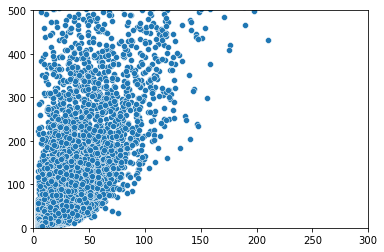

In [393]:
sns.scatterplot(y = variance_of_top_75, x = top_75_percentile_genes.mean(axis =1))
plt.xlim((0,300))
plt.ylim(0,500)

In [394]:
gene_quantile_values = pd.qcut(x =expressed_genes_ranks, q = 20, labels = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten','Eleven','Twelve','Thirteen','Fourteen','Fifteen','Sixteen','Seventeen','Eighteen','Nineteen'])

In [395]:
gene_quantile_values_2 = pd.qcut(x =expressed_genes_ranks, q = 10, labels = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine'])

In [396]:
gene_quantile_values_no_fea = pd.qcut(x =expressed_genes_ranks_no_fea, q = 20, labels = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten','Eleven','Twelve','Thirteen','Fourteen','Fifteen','Sixteen','Seventeen','Eighteen','Nineteen'])

In [397]:
quantile_list = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten','Eleven','Twelve','Thirteen','Fourteen','Fifteen','Sixteen','Seventeen','Eighteen','Nineteen']
quantile_list_2 = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

In [398]:
list_of_highly_variable_genes = []
for quant in quantile_list:
    panda_of_quant =  top_75_percentile_genes.loc[gene_quantile_values == quant]
    ranks_of_quant = panda_of_quant.var(axis =1).rank()
    top_25_ranking = len(ranks_of_quant)*.99
    top_genes_in_quant = ranks_of_quant[ranks_of_quant>top_25_ranking].index
    list_of_highly_variable_genes.extend(top_genes_in_quant)
    

In [399]:
# list_of_highly_variable_genes = []
# for quant in quantile_list_2:
#     panda_of_quant =  top_75_percentile_genes.loc[gene_quantile_values_2 == quant]
#     ranks_of_quant = panda_of_quant.var(axis =1).rank()
#     top_25_ranking = len(ranks_of_quant)*.99
#     top_genes_in_quant = ranks_of_quant[ranks_of_quant>top_25_ranking].index
#     list_of_highly_variable_genes.extend(top_genes_in_quant)
    

In [400]:
list_of_highly_variable_genes_no_fea = []
for quant in quantile_list:
    panda_of_quant_no_fea =  top_75_percentile_genes_no_fea.loc[gene_quantile_values_no_fea == quant]
    ranks_of_quant_no_fea = panda_of_quant_no_fea.var(axis =1).rank()
    top_25_ranking_no_fea = len(ranks_of_quant_no_fea)*.99
    top_genes_in_quant_no_fea = ranks_of_quant_no_fea[ranks_of_quant_no_fea>top_25_ranking_no_fea].index
    list_of_highly_variable_genes_no_fea.extend(top_genes_in_quant_no_fea)

In [401]:
print(len(list_of_highly_variable_genes))

151


In [402]:
highly_variable_and_expressed_genes = top_75_percentile_genes.loc[top_75_percentile_genes.index.isin(list_of_highly_variable_genes)]
highly_variable_and_expressed_genes

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G171181,6980.477197,8534.999850,8136.696846,5508.524340,6458.315974,4242.821765,11550.814710,11290.597890,4928.689784,10102.940837,...,5357.617723,7408.488092,9272.083242,5635.055351,5955.110317,10196.145912,13886.448585,5766.058806,8939.798579,9415.043898
GRMZM2G062724,0.816684,0.000000,0.644011,0.691677,0.000000,156.948186,0.820673,0.864704,0.000000,0.347227,...,0.000000,3.842933,0.902552,0.489846,0.369480,2.997940,0.000000,0.281553,1.435696,0.370977
GRMZM2G075459,2.849900,2.510295,7.405192,2.166220,6.632454,43.378239,1.749605,3.991309,9.332836,7.641864,...,12.803018,6.885293,28.879028,3.049058,50.457244,11.050404,2.874614,6.378739,26.644408,3.554160
GRMZM2G145308,0.658004,0.457093,1.482739,2.222518,0.726722,0.558964,5.396215,1.057823,0.883214,0.878064,...,0.373567,93.526352,0.622267,5.988133,0.000000,0.521033,0.581664,1.537904,1.448014,39.421187
GRMZM2G107854,7.334200,3.811561,4.535574,2.949085,2.436957,3.547124,2.045483,2.547248,1.575992,2.438212,...,1.328938,2.863357,2.676809,2.599187,4.355549,2.309472,3.355159,1.970873,18.703946,2.151378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G429000,152.526760,182.020982,55.499754,8.019116,69.062648,7.661282,11.049166,39.788130,214.743952,102.555674,...,125.348292,233.557469,86.942918,26.021899,23.625145,7.503481,61.446418,10.807884,0.750475,6.764629
GRMZM2G153017,20.203555,18.401909,19.015955,19.632438,24.488922,13.639177,11.877548,17.130906,14.315275,17.297597,...,7.288112,162.623914,4.512762,33.819458,23.160751,5.899001,15.814706,88.488377,13.491900,11.741948
GRMZM2G008611,3.678936,0.000000,2.194635,1.381245,5.310879,3.772817,2.313542,4.474054,0.756805,2.919554,...,1.815232,2.304613,87.976815,0.000000,49.336533,0.448453,3.355159,0.000000,2.608185,10.730239
GRMZM2G106647,42.287077,54.494187,39.148268,46.657907,60.358757,83.385681,21.813778,72.905233,52.721916,52.144119,...,57.962632,45.272485,22.345223,327.188273,62.221431,50.476522,52.991107,52.056679,52.066485,42.368544


In [403]:
highly_variable_and_expressed_genes_no_fea = top_75_percentile_genes_no_fea.loc[top_75_percentile_genes_no_fea.index.isin(list_of_highly_variable_genes_no_fea)]
highly_variable_and_expressed_genes_no_fea

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,Hp301,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059428,1.710071,2.215452,5.970383,0.784974,0.693755,1.054355,0.444356,0.741182,0.756805,2.421421,...,71.095485,64.045539,54.024453,0.639803,6.860822,5.357264,0.000000,33.810140,3.212170,2.400939
GRMZM2G171181,6980.477197,8534.999850,8136.696846,5508.524340,6458.315974,4242.821765,11550.814710,11290.597890,4928.689784,6056.929228,...,5357.617723,7408.488092,9272.083242,5635.055351,5955.110317,10196.145912,13886.448585,5766.058806,8939.798579,9415.043898
GRMZM2G062724,0.816684,0.000000,0.644011,0.691677,0.000000,156.948186,0.820673,0.864704,0.000000,0.584722,...,0.000000,3.842933,0.902552,0.489846,0.369480,2.997940,0.000000,0.281553,1.435696,0.370977
GRMZM2G075459,2.849900,2.510295,7.405192,2.166220,6.632454,43.378239,1.749605,3.991309,9.332836,268.644712,...,12.803018,6.885293,28.879028,3.049058,50.457244,11.050404,2.874614,6.378739,26.644408,3.554160
GRMZM2G145308,0.658004,0.457093,1.482739,2.222518,0.726722,0.558964,5.396215,1.057823,0.883214,73.413764,...,0.373567,93.526352,0.622267,5.988133,0.000000,0.521033,0.581664,1.537904,1.448014,39.421187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G429000,152.526760,182.020982,55.499754,8.019116,69.062648,7.661282,11.049166,39.788130,214.743952,229.563288,...,125.348292,233.557469,86.942918,26.021899,23.625145,7.503481,61.446418,10.807884,0.750475,6.764629
GRMZM2G153017,20.203555,18.401909,19.015955,19.632438,24.488922,13.639177,11.877548,17.130906,14.315275,17.006938,...,7.288112,162.623914,4.512762,33.819458,23.160751,5.899001,15.814706,88.488377,13.491900,11.741948
GRMZM2G008611,3.678936,0.000000,2.194635,1.381245,5.310879,3.772817,2.313542,4.474054,0.756805,1.358483,...,1.815232,2.304613,87.976815,0.000000,49.336533,0.448453,3.355159,0.000000,2.608185,10.730239
GRMZM2G125083,13.127313,0.000000,20.614508,7.382137,0.000000,16.683280,2.333652,4.079308,0.756805,39.785241,...,0.086334,0.198142,0.902552,21.693235,0.369480,0.832985,0.000000,1.050505,0.348770,1.591591


(0.0, 500.0)

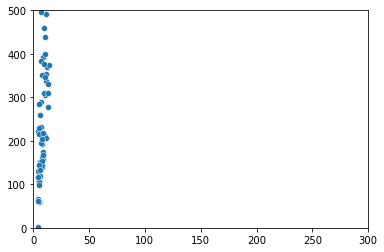

In [404]:
sns.scatterplot(x = highly_variable_and_expressed_genes.mean(axis =1), y = highly_variable_and_expressed_genes.var(axis = 1))
plt.xlim((0,300))
plt.ylim(0,500)

In [405]:
expressed_genes_each_landrace

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,107.003723,23.474131,67.132606,65.815394,112.123231,82.056961,181.446526,167.598631,61.734613,63.564394,...,43.410228,58.590552,128.247043,91.441493,101.856559,59.877009,100.435224,89.777876,88.375791,135.447568
GRMZM2G093399,0.235076,0.000000,2.363888,4.045262,6.617115,2.916686,0.000000,2.304485,0.000000,0.347227,...,0.086334,0.168980,8.868633,2.109341,6.560702,6.345031,0.000000,7.093262,0.000000,4.909926
GRMZM2G023863,0.141308,0.353869,0.214670,20.500296,44.591491,22.857569,9.538722,0.536722,26.484896,0.193112,...,40.077739,2.625485,0.311134,36.188738,0.987196,11.564193,1.677580,18.421694,23.688265,50.144699
GRMZM2G408834,0.000000,0.740949,0.000000,6.660747,9.971197,10.568978,1.244919,7.616281,0.315198,0.171238,...,1.628773,8.108763,2.458220,1.469538,0.917836,1.714949,10.166597,10.656468,0.000000,2.428042
GRMZM2G330436,23.138839,23.234683,24.607922,30.811098,22.900331,47.287038,26.404735,30.485025,25.918527,24.579862,...,25.064037,25.202386,23.121732,20.713543,22.816825,25.693033,16.194131,17.543885,27.602299,24.765810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS8.6,3.142358,1.905781,0.262601,1.796130,4.190384,1.054455,4.971969,2.327166,2.964841,3.064166,...,4.777503,4.488846,2.365675,2.749144,2.274513,1.282991,1.129622,2.533980,5.565140,2.771916
RPL14,10.642144,7.088621,4.826633,6.076968,8.789880,6.613502,8.710340,4.368987,7.630435,5.531873,...,8.594949,7.624366,8.994676,11.746360,5.642865,5.159067,6.811438,2.458272,8.870864,5.307824
GRMZM5G853305,2.069799,2.853177,4.490639,3.162773,5.572781,2.538596,3.527029,0.741182,3.468829,2.863434,...,3.755017,1.852635,1.774257,3.238990,2.574634,1.481256,1.129622,2.739825,1.099244,4.633262
RPS3.1,7.290184,7.438898,5.154122,6.226563,7.272790,5.196469,9.639272,6.578360,10.153669,5.467139,...,10.026627,7.174660,8.184669,6.288047,7.106185,4.601023,7.873646,9.811808,9.451685,5.530464


In [406]:
corr_and_p_value_list = []
for land_race_gene in highly_variable_and_expressed_genes.iterrows():
    current_correlation, current_pvalue = stats.spearmanr(land_race_gene[1],NAM_list_of_avg_meristem_sizes)
    current_values_to_append = [current_correlation,current_pvalue]
    corr_and_p_value_list.append(current_values_to_append)

In [407]:
corr_and_p_value_list_no_fea = []
for land_race_gene in highly_variable_and_expressed_genes_no_fea.iterrows():
    current_correlation, current_pvalue = stats.spearmanr(land_race_gene[1],NAM_list_of_avg_meristem_sizes_no_fea)
    current_values_to_append = [current_correlation,current_pvalue]
    corr_and_p_value_list_no_fea.append(current_values_to_append)

In [408]:
stats_and_pearson_calculated = pd.DataFrame(index = highly_variable_and_expressed_genes.index, data = corr_and_p_value_list, columns = ['Pearson Correlation with Meristem Width','P Value'])
stats_and_pearson_calculated = stats_and_pearson_calculated.dropna()

In [409]:
stats_and_pearson_calculated_no_fea = pd.DataFrame(index = highly_variable_and_expressed_genes_no_fea.index, data = corr_and_p_value_list_no_fea, columns = ['Pearson Correlation with Meristem Width','P Value'])
stats_and_pearson_calculated_no_fea = stats_and_pearson_calculated_no_fea.dropna()

In [410]:
stats_and_pearson_calculated

,Pearson Correlation with Meristem Width,P Value
GRMZM2G171181,-0.170969,0.403675
GRMZM2G062724,-0.040395,0.844668
GRMZM2G075459,0.053684,0.794507
GRMZM2G145308,-0.032142,0.876133
GRMZM2G107854,0.207215,0.309769
...,...,...
GRMZM2G429000,0.352881,0.077021
GRMZM2G153017,0.306719,0.127495
GRMZM2G008611,-0.049957,0.808504
GRMZM2G106647,-0.135066,0.510630


In [411]:
stats_and_pearson_calculated_no_fea.sort_values(by = 'P Value').head(50)

,Pearson Correlation with Meristem Width,P Value
GRMZM2G109959,0.605518,0.001339
GRMZM2G011523,0.478169,0.015618
GRMZM2G080466,0.457780,0.021388
GRMZM2G050961,0.410464,0.041544
GRMZM2G056988,-0.398923,0.048225
GRMZM2G046776,-0.382316,0.059284
GRMZM2G467756,0.378150,0.062344
GRMZM2G149323,0.368148,0.070187
GRMZM2G306679,0.367835,0.070444
GRMZM2G077400,-0.349877,0.086438


In [412]:
stats_and_pearson_calculated.sort_values(by = 'P Value').head(50)

,Pearson Correlation with Meristem Width,P Value
GRMZM2G109959,0.640112,0.000429
GRMZM2G323888,0.614806,0.000832
GRMZM2G053720,0.540947,0.004324
GRMZM2G080466,0.518037,0.006711
GRMZM2G050961,0.475295,0.014132
GRMZM2G178576,0.454437,0.019687
GRMZM2G467756,0.443495,0.023247
GRMZM2G011523,0.440417,0.024338
GRMZM2G149323,0.438366,0.025087
GRMZM2G306679,0.417685,0.033738


<AxesSubplot:xlabel='P Value', ylabel='Count'>

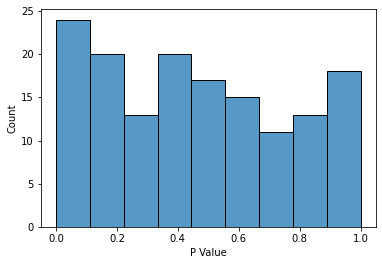

In [413]:
sns.histplot(data = stats_and_pearson_calculated, x = 'P Value')

In [414]:
reject, corrected, value_3, value_4 = statsmodels.stats.multitest.multipletests(stats_and_pearson_calculated['P Value'],method = 'fdr_bh')
stats_and_pearson_calculated['Corrected P Value'] = corrected

In [415]:
stats_and_pearson_calculated.sort_values(by = 'Corrected P Value', ascending= True)

,Pearson Correlation with Meristem Width,P Value,Corrected P Value
GRMZM2G109959,0.640112,0.000429,0.062780
GRMZM2G323888,0.614806,0.000832,0.062780
GRMZM2G053720,0.540947,0.004324,0.217658
GRMZM2G080466,0.518037,0.006711,0.253335
GRMZM2G011523,0.440417,0.024338,0.420909
...,...,...,...
GRMZM2G105233,0.009591,0.962913,0.997331
GRMZM2G139805,0.006501,0.974855,0.997331
GRMZM2G080603,0.000000,1.000000,1.000000
GRMZM2G108807,0.003096,0.988024,1.000000


In [293]:
reject, corrected_no_fea, value_3, value_4 = statsmodels.stats.multitest.multipletests(stats_and_pearson_calculated_no_fea['P Value'],method = 'fdr_bh')
stats_and_pearson_calculated_no_fea['Corrected P Value'] = corrected_no_fea

In [294]:
stats_and_pearson_calculated_no_fea.sort_values(by = 'Corrected P Value', ascending= True)

,Pearson Correlation with Meristem Width,P Value,Corrected P Value
GRMZM2G008773,-0.148490,0.478708,0.999271
GRMZM2G009719,0.150798,0.471820,0.999271
GRMZM2G154278,0.133513,0.524616,0.999271
GRMZM2G441906,0.235045,0.258058,0.999271
GRMZM2G590027,0.079939,0.704064,0.999271
...,...,...,...
GRMZM2G167262,-0.269667,0.192365,0.999271
GRMZM2G446185,-0.326468,0.111213,0.999271
GRMZM2G178005,0.113868,0.587846,0.999271
GRMZM2G046024,0.177726,0.395362,0.999271


In [57]:
significant_genes = stats_and_pearson_calculated.loc[stats_and_pearson_calculated['Corrected P Value'] < .05]
significant_genes.sort_values(by = 'Corrected P Value').head(10)

,Pearson Correlation with Meristem Width,P Value,Corrected P Value


In [58]:
import GO_Enrichment_Calculator
import Go_annotations

In [60]:
maize_go_annotations = Go_annotations.get_go_annotations_as_panda('maize')
maize_go_annotations

GO_term,GO:0000002,GO:0000003,GO:0000009,GO:0000012,GO:0000014,GO:0000015,GO:0000018,GO:0000019,GO:0000023,GO:0000025,...,GO:2001239,GO:2001240,GO:2001242,GO:2001243,GO:2001251,GO:2001252,GO:2001253,GO:2001289,GO:2001293,GO:2001294
NetworkIDs,,,,,,,,,,,,,,,,,,,,,
Zm00001d000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d054105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
maize_converter = pd.read_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/ensmbl_to_grm_table.csv')
maize_converter

,EnsemblID,GRM Name
0,Zm00001d027231,GRMZM2G059865
1,Zm00001d027267,GRMZM2G374779
2,Zm00001d027268,GRMZM2G374812
3,Zm00001d027276,GRMZM2G002121
4,Zm00001d027277,GRMZM2G026639
...,...,...
15502,Zm00001d000438,GRMZM2G175812
15503,Zm00001d000439,GRMZM5G886913
15504,Zm00001d000443,GRMZM2G354053
15505,Zm00001d000447,GRMZM2G120940


In [63]:
converted_genes = significant_genes.merge(right = maize_converter, left_index= True, right_on= 'GRM Name')
converted_genes

,Pearson Correlation with Meristem Width,P Value,Corrected P Value,EnsemblID,GRM Name
24,0.789594,1.622047e-06,0.000901,Zm00001d027317,GRMZM2G042250
277,0.676480,1.481175e-04,0.017079,Zm00001d027965,GRMZM2G024099
399,0.851943,3.368673e-08,0.000077,Zm00001d028348,GRMZM2G116846
464,0.629277,5.731923e-04,0.040110,Zm00001d028495,GRMZM2G150827
477,0.684505,1.148620e-04,0.014039,Zm00001d028531,GRMZM2G151582
...,...,...,...,...,...
15217,0.639127,4.402103e-04,0.033349,Zm00001d026255,GRMZM2G094360
15341,0.656208,2.724288e-04,0.025006,Zm00001d026588,GRMZM2G150286
15372,0.663780,2.181181e-04,0.021385,Zm00001d026652,GRMZM2G074107
15379,0.623752,6.621014e-04,0.043353,Zm00001d026671,GRMZM2G177151


In [66]:
list_of_significant_converted_genes = converted_genes['EnsemblID'].to_list()
list_of_significant_converted_genes

['Zm00001d027317',
 'Zm00001d027965',
 'Zm00001d028348',
 'Zm00001d028495',
 'Zm00001d028531',
 'Zm00001d028565',
 'Zm00001d029238',
 'Zm00001d029630',
 'Zm00001d029703',
 'Zm00001d029740',
 'Zm00001d029896',
 'Zm00001d029983',
 'Zm00001d031061',
 'Zm00001d031488',
 'Zm00001d031727',
 'Zm00001d031808',
 'Zm00001d032030',
 'Zm00001d032035',
 'Zm00001d032115',
 'Zm00001d032810',
 'Zm00001d033154',
 'Zm00001d033312',
 'Zm00001d033793',
 'Zm00001d033983',
 'Zm00001d034034',
 'Zm00001d034218',
 'Zm00001d049613',
 'Zm00001d049984',
 'Zm00001d050021',
 'Zm00001d050830',
 'Zm00001d051055',
 'Zm00001d052333',
 'Zm00001d052759',
 'Zm00001d052950',
 'Zm00001d053016',
 'Zm00001d053406',
 'Zm00001d054074',
 'Zm00001d001865',
 'Zm00001d001869',
 'Zm00001d001880',
 'Zm00001d002520',
 'Zm00001d002873',
 'Zm00001d002982',
 'Zm00001d003386',
 'Zm00001d004706',
 'Zm00001d004936',
 'Zm00001d005208',
 'Zm00001d005538',
 'Zm00001d005716',
 'Zm00001d005752',
 'Zm00001d006010',
 'Zm00001d006195',
 'Zm00001d00

In [67]:
contigency_tables = GO_Enrichment_Calculator.generate_contigency_tables(maize_go_annotations, list_of_significant_converted_genes)

In [71]:
fishers_results = GO_Enrichment_Calculator.fishers_exact_on_contigency_tables(contigency_tables, maize_go_annotations)

In [77]:
fishers_results.sort_values(by = 'P_value').head(40)

,P_value
GO_term,
GO:0044210,0.000382
GO:2000574,0.000811
GO:2000580,0.000811
GO:2000576,0.000811
GO:2000582,0.000811
GO:0051959,0.000811
GO:0030286,0.000811
GO:0005868,0.000811
GO:0045505,0.000811


In [74]:
corrected_results = GO_Enrichment_Calculator.multi_hypothesis_correct_fishers_exact(fishers_results)

In [76]:
corrected_results.sort_values(by = 'P_value')

,P_value
GO_term,
GO:0051959,0.75456
GO:0005868,0.75456
GO:2000582,0.75456
GO:0044210,0.75456
GO:2000580,0.75456
...,...
GO:0010256,1.00000
GO:0010253,1.00000
GO:0010252,1.00000
